# Exercise 7.22. : Travelling salesman problem with Metropolis-Hastings Algorithm


## Introduction


The travelling salesman problem (TSP) can be formulated as follows : a salesmans has to visit $N \in \mathbb{N}$ customers, all living in different places  $\{ 1, ..., N \}$. The salesmans minds the planet, so he doesn't want to spend too much gas visiting his customers : he wants to drive as few miles as possible. Thus, he must choose the shortest route to visit his $N$ customers. 

The problem can be expressed as follows, considering $d$ a distance on all the places $1, ..., N$, and the permutations $\sigma \in \mathcal{S}^{N}$ which define the order in which the travelling salesman sees his customers: 

$$\underset{\sigma \in \mathcal{S}^N}{\min}  \sum_{i} d(i, \sigma(i)) $$

In order to illustrate the problem, we define a function $\texttt{create_places}$ which randomly creates $N$ places in $[0,1]^2$, a function $\texttt{generate_permutation}$ that gives a random permutation in which to visit the places, and a function $\texttt{compute_distance}$ which computes the total distance of a route for a given permutation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import uniform
from numpy.random import shuffle
from numpy.random import randint

%matplotlib inline

def create_places(N):
    ls = []
    for i in range(N):
        x = uniform()
        y = uniform()
        ls.append([x, y])
    return ls

def plot_places(ls):
    ls_x = [ls[i][0] for i in range(len(ls))]
    ls_y = [ls[i][1] for i in range(len(ls))]
    plt.figure()
    plt.scatter(ls_x, ls_y)
    plt.show()
    
def generate_permutation(N):
    ls = [i for i in range(N)]
    shuffle(ls)
    return ls

def compute_distance(places, permutation):
    d = 0
    N = len(places)
    for i in range(N-1):
        current_place = permutation[i]
        current_place_coordinates = places[current_place]
        next_place = permutation[i+1]
        next_place_coordinates = places[next_place]
        distance = np.sqrt((current_place_coordinates[0]-next_place_coordinates[0])**2 
                         +(current_place_coordinates[1]-next_place_coordinates[1])**2)
        d = d + distance
    return d

def draw_travel(places, permutation):
    ls = places
    ls_x = [ls[permutation[i]][0] for i in range(len(ls))]
    ls_y = [ls[permutation[i]][1] for i in range(len(ls))]
    plt.figure()
    plt.plot(ls_x, ls_y)
    plt.show()    

Let's randomly create a set of $10$ places on $[0, 1]^2$ and plot it. 

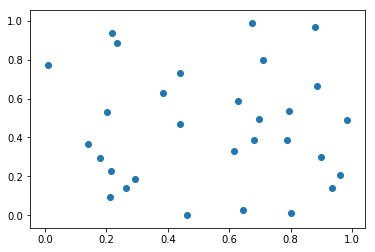

In [2]:
places = create_places(30)
plot_places(places)

Now, we randomly generate, and draw a route for the salesman to see all his customers. This random route isn't very efficient!

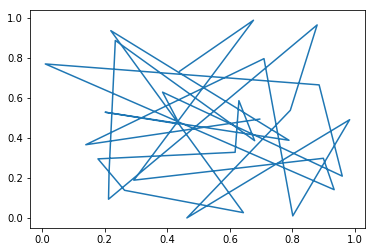

16.413415295826205


In [3]:
travel = generate_permutation(30)
draw_travel(places, travel)
print(compute_distance(places, travel))

Let's give another try to this random strategy:

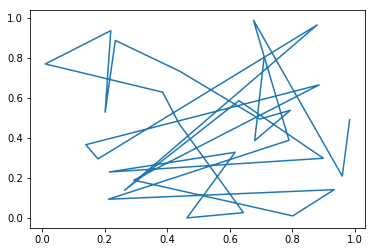

13.49847961164619


In [4]:
travel = generate_permutation(30)
draw_travel(places, travel)
print(compute_distance(places, travel))

## Metropolis-Hastings, Simulated Annealing and the TSP problem

The TSP problem can be tackled through a Metropolis Hastings algorithm. Let's define $H(\sigma) = \sum_{i} d(i, \sigma(i))$. $H$ is the objective function to minimize, with regard to a permutation $\sigma$.
Following a Simulated-Annealing scheme, we want to :

At step $i$, given a permutation $\sigma_i$:
- 1. Simulate $\zeta$ a new permutation candidate, from an instrumental density $g(|\zeta-\sigma_i|)$
- 2. Compute: $$ \rho_i = min\{\exp (\frac{\Delta h_i}{T_i}) , 1\}$$ and take $\sigma_{i+1} = \zeta$ with probability $\rho_i$, $\sigma_{i+1} = \sigma_{i}$ otherwise. 
- 3. Update $T_i$ to $T_{i+1}$

To implement this algorithm, two things are to be precised : the instrumental density $g$, and the 'temperature' function $T_t$.
    
    
First, we represent a permutation $\sigma \in \mathcal{S}^N$ as a vector of dimension $N$, in the form of : 
$$\sigma = \left ( \begin{array}{c} \sigma(1) \\ \sigma(2) \\ \vdots \\ \sigma(N) \end{array} \right )$$ 

At each step $i$, we want to randomly generate a candidate permutation $\zeta$, close to $\sigma_i$. An idea for that is to randomly chose a pair of coordinates in the $\sigma_i$ vector and permute them. This randomly generates a new permutation $\zeta$ close to $\sigma_i$. We define this function as follows :

In [5]:
def generate_close_perm(permutation):
    N = len(permutation)
    x_1 = randint(0, N-1)
    x_2 = randint(0, N-1)
    # Warning : this form allows x_1 to be equal to x_2
    permutation[x_1], permutation[x_2] = permutation[x_2], permutation[x_1]
    return permutation

In [6]:
print(travel)
print(generate_close_perm(travel))

[16, 4, 18, 9, 27, 17, 22, 14, 24, 7, 25, 12, 3, 19, 21, 5, 29, 2, 6, 20, 8, 15, 11, 28, 10, 1, 23, 0, 26, 13]
[16, 4, 18, 9, 27, 17, 22, 14, 24, 7, 25, 12, 3, 19, 21, 5, 29, 2, 1, 20, 8, 15, 11, 28, 10, 6, 23, 0, 26, 13]


As explained in the "warning" comment in the function, the permutation indices can be equal. In this case, $\zeta = \sigma_i, \Delta h_i = 0, \rho_i = 0$, so with probability $1$, $\sigma_{i+1} = \sigma_{i}$. This is slows notably the algorithm. We write another function that doesn't enable $x_1 = x_2$ : 

In [7]:
def generate_close_perm2(permutation):
    N = len(permutation)
    perm2 = [permutation[i] for i in range(N)]
    x_1 = 0
    x_2 = 0
    while x_1 == x_2:
        x_1 = randint(0, N-1)
        x_2 = randint(0, N-1)
    perm2[x_1], perm2[x_2] = permutation[x_2], permutation[x_1]
    return perm2

print(travel)
print(generate_close_perm2(travel))

[16, 4, 18, 9, 27, 17, 22, 14, 24, 7, 25, 12, 3, 19, 21, 5, 29, 2, 1, 20, 8, 15, 11, 28, 10, 6, 23, 0, 26, 13]
[16, 4, 18, 9, 27, 17, 22, 14, 24, 8, 25, 12, 3, 19, 21, 5, 29, 2, 1, 20, 7, 15, 11, 28, 10, 6, 23, 0, 26, 13]


Regarding the temperature function $T_t$, we can choose, as a first guess, the example from section $5.2.3$, namely $T_t = \frac{1}{log(t)}$:

In [8]:
def T(t):
    if np.log(t+1) != 0:
        return 1/np.log(t+1)
    else:
        return None

We now implement a function that computes each $\rho_i$, and the Simulated-Annealing function : 

In [9]:
def compute_rho(places, t, permutation1, permutation2):
    delta = compute_distance(places, permutation1) - compute_distance(places, permutation2)
    x = T(t)
    return min(1, np.exp(delta/x))

def get_next_SApermutation(places, perm1, t):
    perm2 = generate_close_perm2(perm1)
    rho = compute_rho(places, t, perm1, perm2)
    u = uniform()
    if u<rho:
        perm = perm2
    else:
        perm = perm1
    return perm

def generate_n_perms(places, permutation_0, n):
    ls_perms = [permutation_0]
    for i in range(1, n):
        ls_perms.append(get_next_SApermutation(places, ls_perms[-1], i))
    return ls_perms



In [10]:
ls = generate_n_perms(places, travel, 100000)

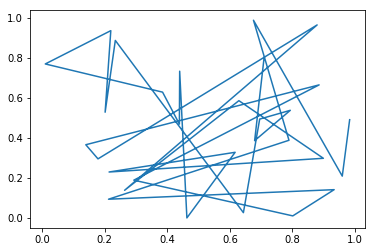

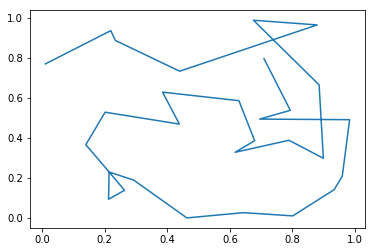

In [11]:
for i in range(len(ls)):
    if i in [0, len(ls)-1] :
        draw_travel(places, ls[i])

The algorithm seems to converge to a good solution, but it is pretty computationnally expensive and slow. Under is given a figure of the total distance to drive for each route decided by the algorithm :

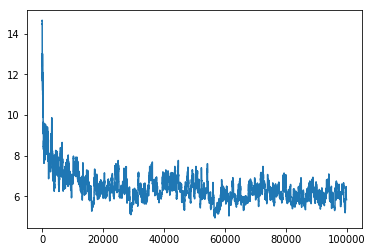

In [12]:
indices = [i for i in range(len(ls))]
distances = [compute_distance(places, ls[i]) for i in range(len(ls))]
plt.figure()
plt.plot(indices, distances)
plt.show()

The algorithm has a poor convergence quality. The minimum distance travel amongst the 100.000 generated routes corresponds to the following : 

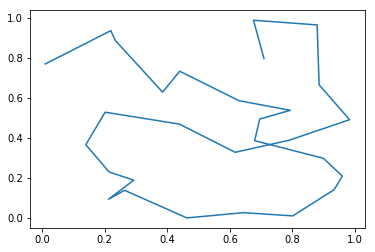

In [13]:
i = np.argmin(distances)
draw_travel(places,ls[i])

In [14]:
print(compute_distance(places, ls[i]))

4.936694596970021


Now, in order to have a better convergence, we try to change the temperature function.

In [38]:
min_dist = [0]*100
for l in range(20):
    ls_ls = []
    for a in range(1,101):
        def T(t):
            if np.log(t+1) != 0:
                return 1/np.log(float((t+1)**a))
            else:
                return None
        ls = generate_n_perms(places, travel, 1000)
        ls_ls.append(ls)

        indices = [i for i in range(len(ls))]
        distances = [compute_distance(places, ls[i]) for i in range(len(ls))]

        i = np.argmin(distances)
        min_dist[a-1]  = min_dist[a-1] + (compute_distance(places, ls[i]))
min_dist = [min_dist[i]/20 for i in range(100)]

86


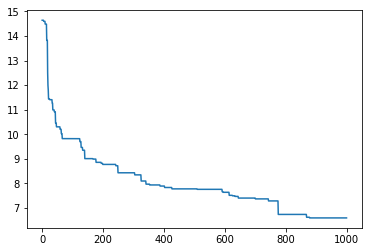

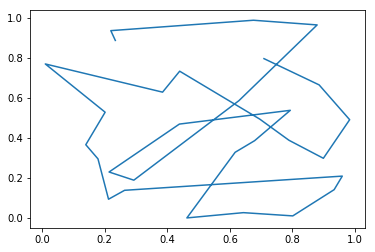

6.220225819638561


In [43]:
a = np.argmin(min_dist)
print(a)
ls = ls_ls[a]
plt.figure()
plt.plot(indices, distances)
plt.show()
draw_travel(places,ls[i])
print(min_dist[a])

(array([ 2.,  1.,  2.,  6.,  6.,  9., 15.,  9., 14.,  7., 10.,  5.,  6.,
         2.,  2.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([6.22022582, 6.25681094, 6.29339606, 6.32998118, 6.3665663 ,
        6.40315142, 6.43973654, 6.47632167, 6.51290679, 6.54949191,
        6.58607703, 6.62266215, 6.65924727, 6.69583239, 6.73241751,
        6.76900263, 6.80558775, 6.84217287, 6.878758  , 6.91534312,
        6.95192824, 6.98851336, 7.02509848, 7.0616836 , 7.09826872,
        7.13485384, 7.17143896, 7.20802408, 7.2446092 , 7.28119432,
        7.31777945]),
 <a list of 30 Patch objects>)

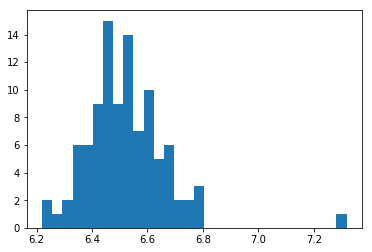

In [42]:
plt.hist(min_dist, bins=30)

This temperature function is slightly better in terms of variance and result.

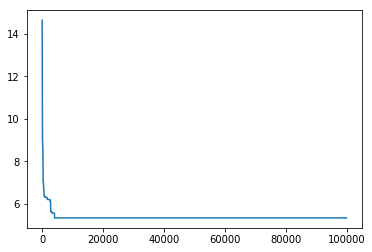

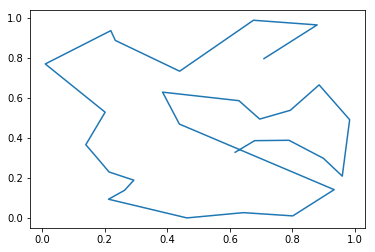

5.33174920697293


In [21]:
def T(t):
    if np.log(t+1) != 0:
        return 1/(t**2)
    else:
        return None
    
    
ls = generate_n_perms(places, travel, 100000)

indices = [i for i in range(len(ls))]
distances = [compute_distance(places, ls[i]) for i in range(len(ls))]
plt.figure()
plt.plot(indices, distances)
plt.show()

i = np.argmin(distances)
draw_travel(places,ls[i])

print(compute_distance(places, ls[i]))